In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%pylab inline
from numpy.linalg import *
import sympy as sp

from mpl_toolkits import mplot3d
%matplotlib inline

import pandas as pd
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


#Laboratorio 5
##Jhoan Alejandro Londoño Restrepo
C.C.1000194087

**1.** Para los datos del laboratorio anterior aplicar la ecuacion normal.

In [ ]:
N = 100

x1 = np.zeros(N)
x2 = np.zeros(N)
y = np.zeros(N)

for i in range(N):
  x1[i] = np.random.randint(0,100)
  x2[i] = np.random.randint(0,100)

#y = func([x1,x2])
for i in range(N):
  y[i] = 2.1*x1[i] + 3.1*x2[i]

In [ ]:
Xarray = np.c_[np.ones((N,1)),x1,x2]

Aplicando la ecuación normal:

$$ \theta = (\boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T y
$$

Obtenemos el vector $\theta$ igual a:

In [ ]:
B = np.linalg.inv(Xarray.T.dot(Xarray)).dot(Xarray.T).dot(y)

print(f" θ₀ =  {B[0]} \t θ₁ = {B[1]} \t θ₂ = {B[2]}")

 θ₀ =  1.1368683772161603e-13 	 θ₁ = 2.1000000000000005 	 θ₂ = 3.0999999999999996


**2.** Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

In [ ]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})
df

,mean_,rm
0,24.0,6.575
1,21.6,6.421
2,34.7,7.185
3,33.4,6.998
4,36.2,7.147
...,...,...
501,22.4,6.593
502,20.6,6.120
503,23.9,6.976
504,22.0,6.794


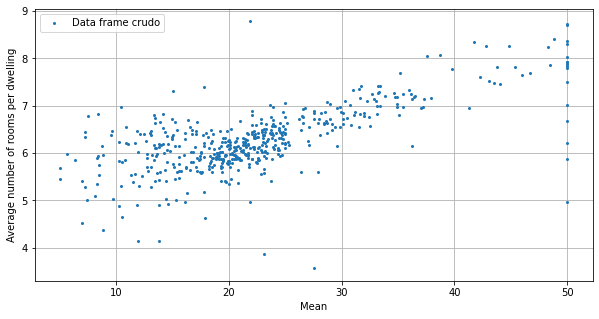

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["mean_"], df["rm"],"o",ms=2, label= "Data frame crudo")
plt.xlabel("Mean")
plt.ylabel("Average number of rooms per dwelling")
plt.grid()
plt.legend()

Graficamos el diagrama de caja y así observar sus outliers

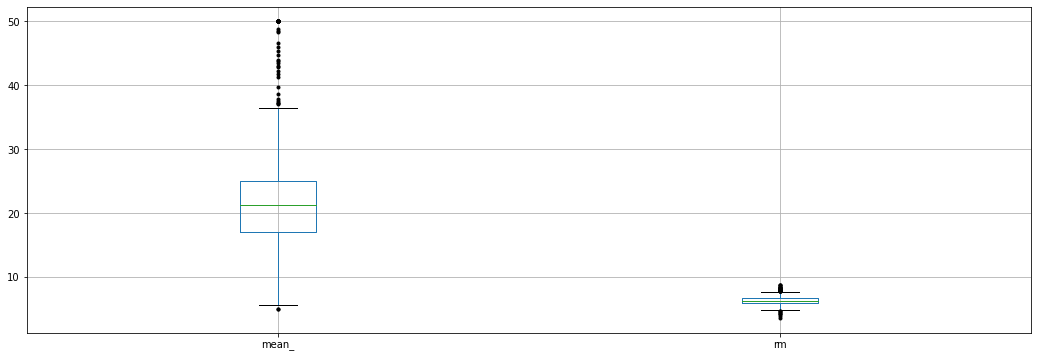

In [ ]:
df.boxplot(sym = 'k.', figsize=(18,6))

Eliminamos los outliers

In [ ]:
Q1mean = df["mean_"].quantile(0.25)
Q1rm = df["rm"].quantile(0.25)

Q3mean = df["mean_"].quantile(0.75)
Q3rm = df["rm"].quantile(0.75)

IQRmean = Q3mean - Q1mean
IQRrm = Q3rm - Q1rm

B1mean = Q1mean - 1.5*IQRmean
B2mean = Q3mean + 1.5*IQRmean

B1rm = Q1rm - 1.5*IQRrm
B2rm = Q3rm + 1.5*IQRrm

df_limpio = df[(df["mean_"] > B1mean) & (df["mean_"] < B2mean) & (df["rm"] > B1rm) & (df["rm"] < B2rm)]

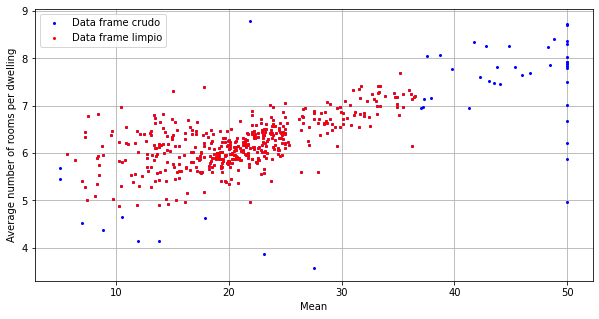

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["mean_"], df["rm"],"bo",ms=2, label= "Data frame crudo")
plt.plot(df_limpio["mean_"], df_limpio["rm"],"ro",ms=2 , label="Data frame limpio")
plt.xlabel("Mean")
plt.ylabel("Average number of rooms per dwelling")
plt.grid()
plt.legend()

In [ ]:
Xarray = np.c_[np.ones((len(df_limpio["mean_"]),1)),df_limpio["mean_"]]
y = df_limpio["rm"]

Usando la ecuación normal obtenemos los valores del vector $\theta$ igual a:

In [ ]:
B = np.linalg.inv(Xarray.T.dot(Xarray)).dot(Xarray.T).dot(y)
print(f"θ₀ = {B[0]} \t θ₁ = {B[1]}")

θ₀ = 5.200903721114353 	 θ₁ = 0.04838258322566042


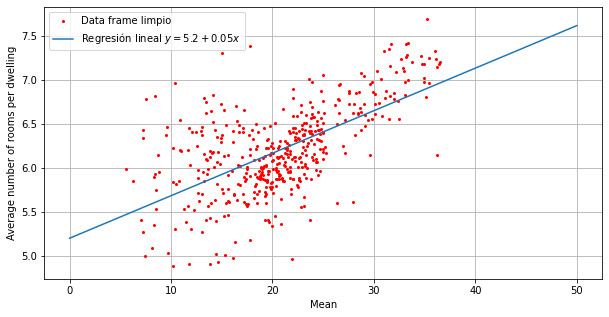

In [ ]:
xs = np.linspace(0,50,500)

plt.figure(figsize=(10,5))
#plt.plot(df["mean_"], df["rm"],"bo",ms=2, label= "Data frame crudo")
plt.plot(df_limpio["mean_"], df_limpio["rm"],"ro",ms=2 , label="Data frame limpio")
plt.plot(xs,B[0]+ B[1]*xs, label=f"Regresión lineal $y = {round(B[0],2)} + {round(B[1],2)} x$")
plt.xlabel("Mean")
plt.ylabel("Average number of rooms per dwelling")
plt.grid()
plt.legend()

Como podemos observar el average number of rooms per dweling se ajusta a los datos con una ecuación igual a:

$$ y = 5.2 + (0.05)x$$

Siendo y: average number of rooms per dweling y x: mean